This notebook will be updated regularly at
https://github.com/rachelss/BigDataAnalysis/blob/gh-pages/Class_April4.ipynb

In [46]:
a = 'a'
a = 'b'  #this is a string
b = 1  #this is an int
c = [1,2,3] #this is a list
d = {'a':1,'b':1}

In [47]:
a = [1,3,5,9,10,2,4]
print(a)

[1, 3, 5, 9, 10, 2, 4]


In [48]:
b = sorted(a) #assigning output of function to new object
print(b)

[1, 2, 3, 4, 5, 9, 10]


In [49]:
a = [1,3,5,9,10,2,4]
a = sorted(a)  #reassign sorted to a
print(a)

[1, 2, 3, 4, 5, 9, 10]


In [50]:
a = [1,3,5,9,10,2,4]
a.sort()
print(a)

[1, 2, 3, 4, 5, 9, 10]


In [51]:
a = [1,3,5,9,10,2,4]
a.append(6)
print(a)

[1, 3, 5, 9, 10, 2, 4, 6]


In [52]:
a = [1,3,5,9,10,2,4]
b = a
a.sort()
print(a)

[1, 2, 3, 4, 5, 9, 10]


In [53]:
print(b)

[1, 2, 3, 4, 5, 9, 10]


In [54]:
a = [1,3,5,9,10,2,4]
b = list(a)
b = a[:]
a.sort()
print(a)
print(b)

[1, 2, 3, 4, 5, 9, 10]
[1, 3, 5, 9, 10, 2, 4]


In [55]:
a.append(15)
print(a)

[1, 2, 3, 4, 5, 9, 10, 15]


In [56]:
a.pop()
print(a)

[1, 2, 3, 4, 5, 9, 10]


In [57]:
a.pop(0)
print(a)

[2, 3, 4, 5, 9, 10]


In [58]:
a.reverse()
print(a)

[10, 9, 5, 4, 3, 2]


In [59]:
type(a)

list

In [60]:
b = 'hello'
list(b)

['h', 'e', 'l', 'l', 'o']

In [61]:
c = 15
c = str(c)
print(c)

15


In [62]:
type(c)

str

In [63]:
int(c)

15

In [64]:
type(c)

str

In [65]:
c = int(c)
type(c)

int

In [66]:
#list to string
print(b)
','.join(b)

hello


'h,e,l,l,o'

In [67]:
import pandas as pd
#might need to install
#conda install pandas

download data using command line curl

!curl -O https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/surveys.csv

In [68]:
survey = pd.read_csv('surveys.csv')

In [69]:
survey

,record_id,month,day,year,plot,species,sex,wgt
0,1,7,16,1977,2,NaN,M,NaN
1,2,7,16,1977,3,NaN,M,NaN
2,3,7,16,1977,2,DM,F,NaN
3,4,7,16,1977,7,DM,M,NaN
4,5,7,16,1977,3,DM,M,NaN
5,6,7,16,1977,1,PF,M,NaN
6,7,7,16,1977,2,PE,F,NaN
7,8,7,16,1977,1,DM,M,NaN
8,9,7,16,1977,1,DM,F,NaN
9,10,7,16,1977,6,PF,F,NaN


In [70]:
print(type(survey))
print(survey.dtypes)

<class 'pandas.core.frame.DataFrame'>
record_id      int64
month          int64
day            int64
year           int64
plot           int64
species       object
sex           object
wgt          float64
dtype: object


### Challenge

In [71]:
survey.columns # prints col names w type
survey.head()  # print first 5 rows
survey.head(15) # print first rows specified
survey.tail() # print last 5 rows
survey.shape # dimensions of data

(35549, 8)

What do the above do and why do some have () and others don't?
() indicate functions
no () indicate attributes

In [72]:
survey.columns

Index(['record_id', 'month', 'day', 'year', 'plot', 'species', 'sex', 'wgt'], dtype='object')

In [73]:
#access species column in data
survey.species

0        NaN
1        NaN
2         DM
3         DM
4         DM
5         PF
6         PE
7         DM
8         DM
9         PF
10        DS
11        DM
12        DM
13        DM
14        DM
15        DM
16        DS
17        PP
18        PF
19        DS
20        DM
21       NaN
22        DM
23        SH
24        DM
25        DM
26        DM
27        DM
28        PP
29        DS
        ... 
35519     SF
35520     DM
35521     DM
35522     DM
35523     PB
35524     OL
35525     OT
35526     DO
35527     US
35528     PB
35529     OT
35530     PB
35531     DM
35532     DM
35533     DM
35534     DM
35535     DM
35536     DM
35537     PB
35538     SF
35539     PB
35540     PB
35541     PB
35542     PB
35543     US
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species, dtype: object

In [74]:
print(type(survey.species))

<class 'pandas.core.series.Series'>


In [75]:
#unique values of a column
pd.unique(survey.species)

array([nan, 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ', 'RF',
       'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS', 'SC',
       'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX', 'PB',
       'PL', 'PX', 'CT', 'US'], dtype=object)

In [76]:
survey.species.unique()

array([nan, 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ', 'RF',
       'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS', 'SC',
       'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX', 'PB',
       'PL', 'PX', 'CT', 'US'], dtype=object)

In [77]:
survey['species'].unique()

array([nan, 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ', 'RF',
       'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS', 'SC',
       'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX', 'PB',
       'PL', 'PX', 'CT', 'US'], dtype=object)

In [78]:
type(survey['species'].unique())

numpy.ndarray

In [79]:
survey['wgt'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: wgt, dtype: float64

In [80]:
print(survey['wgt'].min())
survey['wgt'].max()
survey['wgt'].mean()
survey['wgt'].std()
survey['wgt'].count()

4.0


32283

In [81]:
#group by sex
#then calculate summary stat
survey_by_sex = survey.groupby('sex')
survey_by_sex.mean()

,record_id,month,day,year,plot,wgt
sex,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,42.995379
P,22488.000000,7.000000,21.000000,1995.000000,8.000000,13.000000
R,21704.000000,7.000000,12.000000,1994.000000,12.000000,NaN
Z,23839.000000,4.000000,15.000000,1996.000000,3.000000,18.000000


In [82]:
survey.groupby('sex').mean()

,record_id,month,day,year,plot,wgt
sex,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,42.995379
P,22488.000000,7.000000,21.000000,1995.000000,8.000000,13.000000
R,21704.000000,7.000000,12.000000,1994.000000,12.000000,NaN
Z,23839.000000,4.000000,15.000000,1996.000000,3.000000,18.000000


### Challenge

In [83]:
#the number of records that have sex = Z,P,R

#take the mean of groups when grouped by ['plot','sex']

#summary stats for weight for each plot

In [84]:
sp_counts = survey.groupby('species').record_id.count()

In [85]:
sp_counts.head()

species
AB    303
AH    437
AS      2
BA     46
CB     50
Name: record_id, dtype: int64

In [89]:
survey['wgt']*0.0001

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
35519    0.0036
35520    0.0048
35521    0.0045
35522    0.0044
35523    0.0027
35524    0.0026
35525    0.0024
35526    0.0043
35527       NaN
35528    0.0025
35529       NaN
35530       NaN
35531    0.0043
35532    0.0048
35533    0.0056
35534    0.0053
35535    0.0042
35536    0.0046
35537    0.0031
35538    0.0068
35539    0.0023
35540    0.0031
35541    0.0029
35542    0.0034
35543       NaN
35544       NaN
35545       NaN
35546    0.0014
35547    0.0051
35548       NaN
Name: wgt, dtype: float6

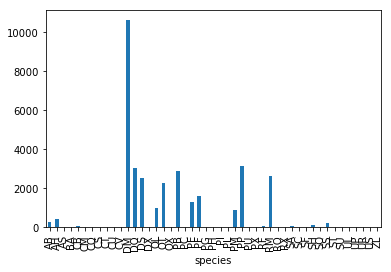

In [90]:
%matplotlib inline

#plot num of each species
sp_counts.plot(kind = 'bar')

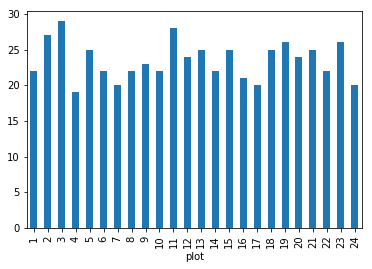

In [92]:
#num of species in each plot
sp_plot = survey.groupby('plot').species.nunique()
sp_plot.plot(kind='bar')

### Challenge

* plot the average weight of all individuals in a plot

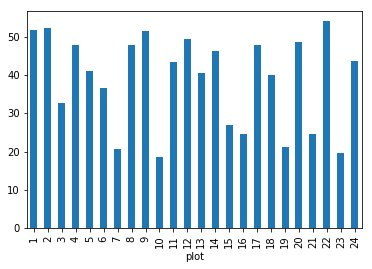

In [93]:
#given data, separate data for each plot, take the mean of the weight
#for each set of plot data
mean_w = survey.groupby('plot').wgt.mean()
mean_w.plot(kind = 'bar')

In [94]:
#number of individuals per species per plot
#think stacked bar plot

sp_plot = survey.groupby(['species','plot'], as_index = False).record_id.count()

In [95]:
sp_plot.head()

,species,plot,record_id
0,AB,1,7
1,AB,2,14
2,AB,3,10
3,AB,4,3
4,AB,5,2


In [97]:
sp_plot_wide = sp_plot.pivot(index = 'plot', columns = 'species', values = 'record_id')

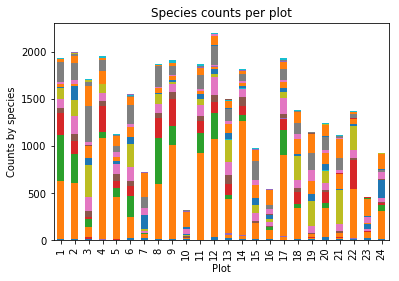

In [101]:
my_plot = sp_plot_wide.plot(kind = 'bar', stacked = True, legend = False, 
                  title = "Species counts per plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Counts by species")

In [104]:
survey_copy = survey.copy()
survey_copy[0:3] = 0
survey_copy.head()

,record_id,month,day,year,plot,species,sex,wgt
0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0.0
3,4,7,16,1977,7,DM,M,NaN
4,5,7,16,1977,3,DM,M,NaN


In [106]:
survey[44:49]

,record_id,month,day,year,plot,species,sex,wgt
44,45,7,18,1977,22,DM,M,NaN
45,46,7,18,1977,19,DM,M,NaN
46,47,7,18,1977,18,DM,M,NaN
47,48,7,18,1977,20,DM,F,NaN
48,49,7,18,1977,12,PP,F,NaN


In [107]:
survey.iloc[0:3,3:4]

,year
0,1977
1,1977
2,1977


In [108]:
survey.loc[[0,10],:]

,record_id,month,day,year,plot,species,sex,wgt
0,1,7,16,1977,2,NaN,M,NaN
10,11,7,16,1977,5,DS,F,NaN


In [112]:
survey.loc[0:3,['species','year']]

,species,year
0,NaN,1977
1,NaN,1977
2,DM,1977
3,DM,1977


In [114]:
survey[survey.year ==2001]
survey[survey.year != 2001]
survey[(survey.year > 1980) & (survey.year <1986)]

,record_id,month,day,year,plot,species,sex,wgt
3685,3686,1,11,1981,11,DM,M,34.0
3686,3687,1,11,1981,20,PE,F,19.0
3687,3688,1,11,1981,13,DM,M,49.0
3688,3689,1,11,1981,8,DS,M,140.0
3689,3690,1,11,1981,11,DM,F,46.0
3690,3691,1,11,1981,13,NaN,F,118.0
3691,3692,1,11,1981,20,DM,M,38.0
3692,3693,1,11,1981,24,NaN,F,192.0
3693,3694,1,11,1981,24,DO,F,49.0
3694,3695,1,11,1981,11,DS,M,130.0


### Challenge

* How many samples contain data from 1999 and have weight less that or equal to 8

* How many samples have sex Z, R, and P?
hint: use the `isin` method: df[df['colname'].isin(mylist)]

* Find rows where the sample is not male or female

hint: len() counts the number of items in a list or the number of rows in a dataframe

In [116]:
len(survey[(survey.year == 1999) & (survey.wgt <=8)])

5

In [123]:
len(survey[(survey.sex == 'Z')| (survey.sex == 'R')| (survey.sex == 'P')])

5

In [126]:
survey[(survey.sex != 'M') & (survey.sex != 'F')]

,record_id,month,day,year,plot,species,sex,wgt
13,14,7,16,1977,8,DM,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN
92,93,8,20,1977,18,DM,NaN,42.0
105,106,8,20,1977,12,NaN,NaN,NaN
106,107,8,20,1977,18,NaN,NaN,NaN
109,110,8,20,1977,10,DS,NaN,NaN
120,121,8,21,1977,15,NaN,NaN,NaN


In [128]:
pd.isnull(survey).head()

,record_id,month,day,year,plot,species,sex,wgt
0,False,False,False,False,False,True,False,True
1,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True
